<a href="https://colab.research.google.com/github/05satyam/AI-ML/blob/main/ML_WordEmbeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gensim

# **Word Embeddings**

---

## Core ideas:
- Particularly how they are generated, used in models, and their importance in deep learning systems

- Word embeddings are vector representations of words that capture semantic meaning.
- Words with similar meanings are mapped to similar positions in a high-dimensional vector space.
- The goal is to reduce dimensionality while preserving the semantic relationships between words.
- Unlike one-hot encoding, which represents words in sparse high-dimensional vectors, word embeddings aim to place semantically similar words close to each other in vector space.


<br />

---

- **One-hot encoding** is a technique used to convert categorical data into a format that can be provided to machine learning algorithms to improve predictions. For a categorical attribute with N unique values, a one-hot encoded vector is an N-dimensional vector where only one of the positions is set to 1, and the rest are 0.

  - For example, consider a color attribute with possible values: "red," "blue," and "green." After applying one-hot encoding, we get the following vectors:

    - Red: [1, 0, 0]

    - Blue: [0, 1, 0]

    - Green: [0, 0, 1]

- Now let us consider a scenario where we have some additional numerical attribute values associated with each category. For instance, let's say we have a sales quantity attribute that indicates how much of each color product was sold:

    - Red: 50

    - Blue: 30

    - Green: 20


 - **Multiplying One-Hot Vectors with Attribute Values**
   - Resulting embeddings look like:

     - Red Embedding: [50, 0, 0]

     - Blue Embedding: [0, 30, 0]

     - Green Embedding: [0, 0, 20]

**Similar concept is used in generating embeddings for a languge corpus.**

<br />

---

## Word embeddings can be generated using several techniques, including:

### Word2Vec: It has two models:
- Skip-gram model: Predicts the surrounding words (context) given a target word.
- CBOW (Continuous Bag of Words): Predicts the target word given the surrounding context words.

### FastText:
- FastText improves upon Word2Vec by taking into account subword information. Instead of learning embeddings for whole words, it learns embeddings for character n-grams, which is useful for handling out-of-vocabulary words

### GloVe (Global Vectors for Word Representation):
- Aims to find word vectors that can encode statistical information from a large text corpus, capturing both global and local context.

### Transformers:
- Modern **deep learning models**, such as BERT and GPT, use word embeddings in a contextualized manner. Instead of having a single fixed vector for a word, these models generate embeddings based on the context in which a word appears. (attention mechanism)

<br />

---

## Embedding Evaluation:
- **Cosine Similarity:** To measure the similarity between two words in the embedding space.
- **t-SNE or PCA:** For visualizing high-dimensional embeddings in a 2D or 3D space.
  

## Examples for embeeding generations:

### small self defined corpus


**Breakdown of Word2Vec**
- Word2Vec(sentences, vector_size=100, window=5, min_count=5, sg=0)

  - vector_size=100 specifies that each word will be embedded in a 100-dimensional space.

  - window=5 refers to the context window size for predicting surrounding words.

  - min_count=5 ensures that only words occurring at least 5 times in the corpus are included in the model.
  
  - sg=0 tells Word2Vec to use the CBOW (Continuous Bag of Words) method instead of the Skip-gram model.

In [19]:


from gensim.models import Word2Vec
sentences = [
    ['machine', 'learning', 'is', 'fun'],
    ['deep', 'learning', 'is', 'powerful'],
    ['artificial', 'intelligence', 'is', 'future']
]

#Train word2vec:
model=Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, sg=0 )
# Get word embedding for 'learning'
vector = model.wv['learning']
print(vector)

[-8.6196875e-03  3.6657380e-03  5.1898835e-03  5.7419385e-03
  7.4669183e-03 -6.1676754e-03  1.1056137e-03  6.0472824e-03
 -2.8400505e-03 -6.1735227e-03 -4.1022300e-04 -8.3689485e-03
 -5.6000124e-03  7.1045388e-03  3.3525396e-03  7.2256695e-03
  6.8002474e-03  7.5307419e-03 -3.7891543e-03 -5.6180597e-04
  2.3483764e-03 -4.5190323e-03  8.3887316e-03 -9.8581640e-03
  6.7646410e-03  2.9144168e-03 -4.9328315e-03  4.3981876e-03
 -1.7395747e-03  6.7113843e-03  9.9648498e-03 -4.3624435e-03
 -5.9933780e-04 -5.6956373e-03  3.8508223e-03  2.7866268e-03
  6.8910765e-03  6.1010956e-03  9.5384968e-03  9.2734173e-03
  7.8980681e-03 -6.9895042e-03 -9.1558648e-03 -3.5575271e-04
 -3.0998408e-03  7.8943167e-03  5.9385742e-03 -1.5456629e-03
  1.5109634e-03  1.7900408e-03  7.8175711e-03 -9.5101865e-03
 -2.0553112e-04  3.4691966e-03 -9.3897223e-04  8.3817719e-03
  9.0107834e-03  6.5365066e-03 -7.1162102e-04  7.7104042e-03
 -8.5343346e-03  3.2071066e-03 -4.6379971e-03 -5.0889552e-03
  3.5896183e-03  5.37033

### PCA AND t-SNE:

---

- **PCA: Principal Component Analysis**
  - A linear technique that reduces the dimensionality of data while retaining the most variance(spread or information).
  - Finds the main axes where data varies the most
  - Works well with high-dimensional data, but only keeps top components
  - Fast and efficient
  - Results are easier to interpret
  - Poor at separating distinct clusters
  - Scales well to very large datasets

- **t-SNE: t-Distributed Stochastic Neighbor Embedding**
  - **Stochastic** means something involves randomness or probabilities.
    - Randomness is used in the process of mapping data from high-dimensional space to lower dimensions, making sure that similar data points stay close together and dissimilar points stay far apart.
  -**Neighbour**  refers to points (or data items) that are "near" each other in the original, high-dimensional space
    - If two points are close together in the original data, they should also be close in the lower-dimensional space.
  -**Embedding** is a representation of data in another form.

  - t-SNE non-linear technique that preserves the local structure of data, often yielding better visualizations for embeddings, especially when there are clusters.
  - Preserve local relationships and clustering
  - Slower, especially for large datasets
  - Harder to interpret due to random initialization and non-linear nature
  - Excellent at showing clusters in data
  - May struggle with very large datasets (computationally intensive)

  - Perplexity is a parameter in t-SNE that roughly defines the number of nearest neighbors each point considers when constructing the low-dimensional representation.
  - default perplexity value (30)

  ---
  

### Visualization

In [ ]:
!pip install matplotlib

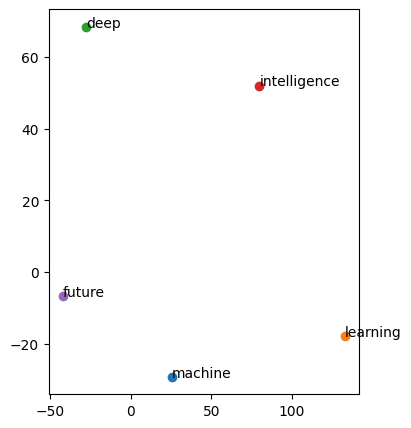

In [20]:
#t-SNE only

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
# Get word vectors for visualization
words = ['machine', 'learning', 'deep', 'intelligence', 'future']
word_vectors = [model.wv[word] for word in words]
# print(f"1. word_vectors: \n\n {word_vectors} \n\n")

word_vectors = np.array(word_vectors)

# print(f"2. word_vectors: \n\n {word_vectors} \n\n")
# Perform t-SNE to reduce dimensionality for visualization
tsne = TSNE(n_components=2, perplexity=3)
word_vec_tsne = tsne.fit_transform(word_vectors)
# print(f"3. word_vec_tsne: \n\n {word_vec_tsne} \n\n")

# Plot the words in 2D space
plt.figure(figsize=(4, 5))
for i, word in enumerate(words):
    plt.scatter(word_vec_tsne[i, 0], word_vec_tsne[i, 1])
    plt.annotate(word, (word_vec_tsne[i, 0], word_vec_tsne[i, 1]))
plt.show()


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


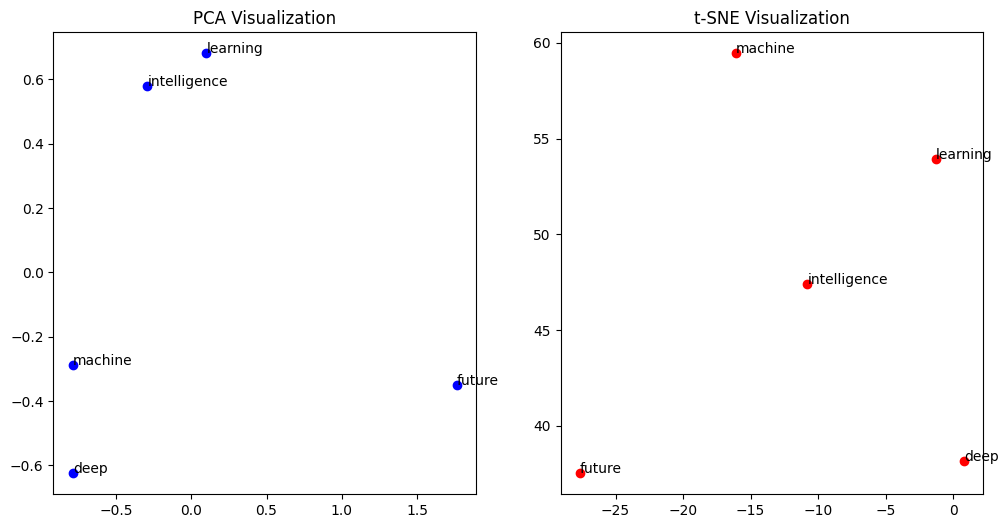

In [22]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

from gensim.models import Word2Vec
from nltk.corpus import brown
import nltk

# Download the Brown corpus (if not already downloaded)
nltk.download('brown')

# Load sentences from the Brown corpus
sentences = brown.sents()

# Train Word2Vec model on the Brown corpus
model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, sg=0)

# Get word vectors for visualization
words = ['machine', 'learning', 'deep', 'intelligence', 'future']
word_vectors = np.array([model.wv[word] for word in words])

# Perform PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
word_vec_pca = pca.fit_transform(word_vectors)

# Perform t-SNE to reduce dimensionality for visualization
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
word_vec_tsne = tsne.fit_transform(word_vectors)

# Plot the words in 2D space using PCA and t-SNE side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# PCA Plot
axes[0].scatter(word_vec_pca[:, 0], word_vec_pca[:, 1], color='blue')
for i, word in enumerate(words):
    axes[0].annotate(word, (word_vec_pca[i, 0], word_vec_pca[i, 1]))
axes[0].set_title('PCA Visualization')

# t-SNE Plot
axes[1].scatter(word_vec_tsne[:, 0], word_vec_tsne[:, 1], color='red')
for i, word in enumerate(words):
    axes[1].annotate(word, (word_vec_tsne[i, 0], word_vec_tsne[i, 1]))
axes[1].set_title('t-SNE Visualization')

plt.show()


# Word Embeddings in LLMs

- Embeddings are the building blocks for models like BERT, GPT, and others.
- Instead of static embeddings (like in Word2Vec), LLMs **generate dynamic embeddings** based on the surrounding context of the words.

<br />

---

## Key Concepts in LLMs:

- **Tokenization:** Breaking text into subwords or characters (byte-pair encoding).

- **Positional Embeddings:** Since transformers lack inherent sequence information, positional embeddings are added to the token embeddings to capture word order.

- **Self-Attention Mechanism:** In transformers, the attention mechanism generates contextualized embeddings, focusing on relevant words in the sentence to build meaning.
